In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import xarray as xr

import random
from IPython.display import HTML

import cartopy.feature as cfeature

from herbie import Herbie_latest, FastHerbie, Herbie
from toolbox import EasyMap, pc, ccrs
import metpy
from metpy.units import units
from paint.standard2 import cm_tmp

from pyart.graph import cm_colorblind 
import xmovie
# I like Py-ART's colorblind freindly colormaps

In [45]:
H = Herbie_latest(model="hrrr", fxx=range(0,10))
H

Could not find 7/63 GRIB files.


▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 19:00 UTC F02 ┊ source=aws

In [146]:
H = Herbie(
    mt,  # model run date
    model="hrrr",  # model name
    product="sfc",  # model produce name (model dependent)
    fxx=0,  # forecast lead time
)
H.read_idx(searchString=":APCP")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
83,84,56387812,56388024,56387812-56388024,2023-01-15 12:00:00,2023-01-15 12:00:00,APCP,surface,0-0 day acc fcst,:APCP:surface:0-0 day acc fcst


In [147]:
qstr = '(' 
nfcst = 47
for i in range(nfcst):
    if i != nfcst -1:
        qstr = qstr +  f':APCP:surface:{i}-{i+1} h*|'
    else:
        qstr = qstr +  f':APCP:surface:{i}-{i+1} h*)'
    

In [148]:
qstr


'(:APCP:surface:0-1 h*|:APCP:surface:1-2 h*|:APCP:surface:2-3 h*|:APCP:surface:3-4 h*|:APCP:surface:4-5 h*|:APCP:surface:5-6 h*|:APCP:surface:6-7 h*|:APCP:surface:7-8 h*|:APCP:surface:8-9 h*|:APCP:surface:9-10 h*|:APCP:surface:10-11 h*|:APCP:surface:11-12 h*|:APCP:surface:12-13 h*|:APCP:surface:13-14 h*|:APCP:surface:14-15 h*|:APCP:surface:15-16 h*|:APCP:surface:16-17 h*|:APCP:surface:17-18 h*|:APCP:surface:18-19 h*|:APCP:surface:19-20 h*|:APCP:surface:20-21 h*|:APCP:surface:21-22 h*|:APCP:surface:22-23 h*|:APCP:surface:23-24 h*|:APCP:surface:24-25 h*|:APCP:surface:25-26 h*|:APCP:surface:26-27 h*|:APCP:surface:27-28 h*|:APCP:surface:28-29 h*|:APCP:surface:29-30 h*|:APCP:surface:30-31 h*|:APCP:surface:31-32 h*|:APCP:surface:32-33 h*|:APCP:surface:33-34 h*|:APCP:surface:34-35 h*|:APCP:surface:35-36 h*|:APCP:surface:36-37 h*|:APCP:surface:37-38 h*|:APCP:surface:38-39 h*|:APCP:surface:39-40 h*|:APCP:surface:40-41 h*|:APCP:surface:41-42 h*|:APCP:surface:42-43 h*|:APCP:surface:43-44 h*|:APCP

In [149]:
H.read_idx(searchString=qstr)

No GRIB messages found. There might be something wrong with searchString='(:APCP:surface:0-1 h*|:APCP:surface:1-2 h*|:APCP:surface:2-3 h*|:APCP:surface:3-4 h*|:APCP:surface:4-5 h*|:APCP:surface:5-6 h*|:APCP:surface:6-7 h*|:APCP:surface:7-8 h*|:APCP:surface:8-9 h*|:APCP:surface:9-10 h*|:APCP:surface:10-11 h*|:APCP:surface:11-12 h*|:APCP:surface:12-13 h*|:APCP:surface:13-14 h*|:APCP:surface:14-15 h*|:APCP:surface:15-16 h*|:APCP:surface:16-17 h*|:APCP:surface:17-18 h*|:APCP:surface:18-19 h*|:APCP:surface:19-20 h*|:APCP:surface:20-21 h*|:APCP:surface:21-22 h*|:APCP:surface:22-23 h*|:APCP:surface:23-24 h*|:APCP:surface:24-25 h*|:APCP:surface:25-26 h*|:APCP:surface:26-27 h*|:APCP:surface:27-28 h*|:APCP:surface:28-29 h*|:APCP:surface:29-30 h*|:APCP:surface:30-31 h*|:APCP:surface:31-32 h*|:APCP:surface:32-33 h*|:APCP:surface:33-34 h*|:APCP:surface:34-35 h*|:APCP:surface:35-36 h*|:APCP:surface:36-37 h*|:APCP:surface:37-38 h*|:APCP:surface:38-39 h*|:APCP:surface:39-40 h*|:APCP:surface:40-41 h*|:

/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this


In [150]:
for i in range(nfcst):
    print(i)
    print(Herbie(
        mt,  # model run date
        model="hrrr",  # model name
        product="sfc",  # model produce name (model dependent)
        fxx=i,  # forecast lead time
    ).read_idx(searchString=qstr))

0
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


No GRIB messages found. There might be something wrong with searchString='(:APCP:surface:0-1 h*|:APCP:surface:1-2 h*|:APCP:surface:2-3 h*|:APCP:surface:3-4 h*|:APCP:surface:4-5 h*|:APCP:surface:5-6 h*|:APCP:surface:6-7 h*|:APCP:surface:7-8 h*|:APCP:surface:8-9 h*|:APCP:surface:9-10 h*|:APCP:surface:10-11 h*|:APCP:surface:11-12 h*|:APCP:surface:12-13 h*|:APCP:surface:13-14 h*|:APCP:surface:14-15 h*|:APCP:surface:15-16 h*|:APCP:surface:16-17 h*|:APCP:surface:17-18 h*|:APCP:surface:18-19 h*|:APCP:surface:19-20 h*|:APCP:surface:20-21 h*|:APCP:surface:21-22 h*|:APCP:surface:22-23 h*|:APCP:surface:23-24 h*|:APCP:surface:24-25 h*|:APCP:surface:25-26 h*|:APCP:surface:26-27 h*|:APCP:surface:27-28 h*|:APCP:surface:28-29 h*|:APCP:surface:29-30 h*|:APCP:surface:30-31 h*|:APCP:surface:31-32 h*|:APCP:surface:32-33 h*|:APCP:surface:33-34 h*|:APCP:surface:34-35 h*|:APCP:surface:35-36 h*|:APCP:surface:36-37 h*|:APCP:surface:37-38 h*|:APCP:surface:38-39 h*|:APCP:surface:39-40 h*|:APCP:surface:40-41 h*|:

/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
83            84    64283271  64681461  64283271-64681461 2023-01-15 12:00:00   

            valid_time variable    level      forecast_time  \
83 2023-01-15 13:00:00     APCP  surface  0-1 hour acc fcst   

                        search_this  
83  :APCP:surface:0-1 hour acc fcst  
2
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    65405091  65797885  65405091-65797885 2023-01-15 12:00:00   

            valid_time variable    level      forecast_time  \
89 2023-01-15 14:00:00     APCP  surface  1-2 hour acc fcst   

                        search_this  
89  :APCP:surface:1-2 hour acc fcst  
3
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    66124282  66553928  66124282-66553928 2023-01-15 12:00:00   

            valid_time variable    level      forecast_time  \
89 2023-01-15 15:00:00     APCP  surface  2-3 hour acc fcst   

                        search_this  
89  :APCP:surface:2-3 hour acc fcst  
4
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    66568412  67057526  66568412-67057526 2023-01-15 12:00:00   

            valid_time variable    level      forecast_time  \
89 2023-01-15 16:00:00     APCP  surface  3-4 hour acc fcst   

                        search_this  
89  :APCP:surface:3-4 hour acc fcst  
5
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    66912355  67437403  66912355-67437403 2023-01-15 12:00:00   

            valid_time variable    level      forecast_time  \
89 2023-01-15 17:00:00     APCP  surface  4-5 hour acc fcst   

                        search_this  
89  :APCP:surface:4-5 hour acc fcst  
6
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    67323949  67869176  67323949-67869176 2023-01-15 12:00:00   

            valid_time variable    level      forecast_time  \
89 2023-01-15 18:00:00     APCP  surface  5-6 hour acc fcst   

                        search_this  
89  :APCP:surface:5-6 hour acc fcst  
7
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    67365353  67923128  67365353-67923128 2023-01-15 12:00:00   

            valid_time variable    level      forecast_time  \
89 2023-01-15 19:00:00     APCP  surface  6-7 hour acc fcst   

                        search_this  
89  :APCP:surface:6-7 hour acc fcst  
8
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    67548360  68124375  67548360-68124375 2023-01-15 12:00:00   

            valid_time variable    level      forecast_time  \
89 2023-01-15 20:00:00     APCP  surface  7-8 hour acc fcst   

                        search_this  
89  :APCP:surface:7-8 hour acc fcst  
9
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    68137531  68743529  68137531-68743529 2023-01-15 12:00:00   

            valid_time variable    level      forecast_time  \
89 2023-01-15 21:00:00     APCP  surface  8-9 hour acc fcst   

                        search_this  
89  :APCP:surface:8-9 hour acc fcst  
10
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    68848981  69473153  68848981-69473153 2023-01-15 12:00:00   

            valid_time variable    level       forecast_time  \
89 2023-01-15 22:00:00     APCP  surface  9-10 hour acc fcst   

                         search_this  
89  :APCP:surface:9-10 hour acc fcst  
11
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F11 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    69170717  69817281  69170717-69817281 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-15 23:00:00     APCP  surface  10-11 hour acc fcst   

                          search_this  
89  :APCP:surface:10-11 hour acc fcst  
12
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    69894124  70554868  69894124-70554868 2023-01-15 12:00:00   

   valid_time variable    level        forecast_time  \
89 2023-01-16     APCP  surface  11-12 hour acc fcst   

                          search_this  
89  :APCP:surface:11-12 hour acc fcst  
13
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F13 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    70272416  70946709  70272416-70946709 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 01:00:00     APCP  surface  12-13 hour acc fcst   

                          search_this  
89  :APCP:surface:12-13 hour acc fcst  
14
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F14 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    71064170  71764228  71064170-71764228 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 02:00:00     APCP  surface  13-14 hour acc fcst   

                          search_this  
89  :APCP:surface:13-14 hour acc fcst  
15
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F15 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    71759254  72469865  71759254-72469865 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 03:00:00     APCP  surface  14-15 hour acc fcst   

                          search_this  
89  :APCP:surface:14-15 hour acc fcst  
16
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F16 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72129365  72851203  72129365-72851203 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 04:00:00     APCP  surface  15-16 hour acc fcst   

                          search_this  
89  :APCP:surface:15-16 hour acc fcst  
17
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F17 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72509753  73243528  72509753-73243528 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 05:00:00     APCP  surface  16-17 hour acc fcst   

                          search_this  
89  :APCP:surface:16-17 hour acc fcst  
18
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F18 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    71944232  72712737  71944232-72712737 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 06:00:00     APCP  surface  17-18 hour acc fcst   

                          search_this  
89  :APCP:surface:17-18 hour acc fcst  
19
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F19 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72003799  72790376  72003799-72790376 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 07:00:00     APCP  surface  18-19 hour acc fcst   

                          search_this  
89  :APCP:surface:18-19 hour acc fcst  
20
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F20 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72691283  73483727  72691283-73483727 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 08:00:00     APCP  surface  19-20 hour acc fcst   

                          search_this  
89  :APCP:surface:19-20 hour acc fcst  
21
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F21 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72786940  73585927  72786940-73585927 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 09:00:00     APCP  surface  20-21 hour acc fcst   

                          search_this  
89  :APCP:surface:20-21 hour acc fcst  
22
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F22 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72297221  73129458  72297221-73129458 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 10:00:00     APCP  surface  21-22 hour acc fcst   

                          search_this  
89  :APCP:surface:21-22 hour acc fcst  
23
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F23 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72823093  73653708  72823093-73653708 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 11:00:00     APCP  surface  22-23 hour acc fcst   

                          search_this  
89  :APCP:surface:22-23 hour acc fcst  
24
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F24 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
83            84    71113744  72235150  71113744-72235150 2023-01-15 12:00:00   
89            90    73650485  74523668  73650485-74523668 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
83 2023-01-16 12:00:00     APCP  surface     0-1 day acc fcst   
89 2023-01-16 12:00:00     APCP  surface  23-24 hour acc fcst   

                          search_this  
83     :APCP:surface:0-1 day acc fcst  
89  :APCP:surface:23-24 hour acc fcst  
25
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F25 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    73350522  74238156  73350522-74238156 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 13:00:00     APCP  surface  24-25 hour acc fcst   

                          search_this  
89  :APCP:surface:24-25 hour acc fcst  
26
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F26 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    74036822  74913068  74036822-74913068 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 14:00:00     APCP  surface  25-26 hour acc fcst   

                          search_this  
89  :APCP:surface:25-26 hour acc fcst  
27
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F27 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    73497464  74375785  73497464-74375785 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 15:00:00     APCP  surface  26-27 hour acc fcst   

                          search_this  
89  :APCP:surface:26-27 hour acc fcst  
28
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F28 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72688229  73565458  72688229-73565458 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 16:00:00     APCP  surface  27-28 hour acc fcst   

                          search_this  
89  :APCP:surface:27-28 hour acc fcst  
29
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F29 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    73529424  74414761  73529424-74414761 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 17:00:00     APCP  surface  28-29 hour acc fcst   

                          search_this  
89  :APCP:surface:28-29 hour acc fcst  
30
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F30 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    73314242  74186724  73314242-74186724 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 18:00:00     APCP  surface  29-30 hour acc fcst   

                          search_this  
89  :APCP:surface:29-30 hour acc fcst  
31
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F31 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72645520  73523175  72645520-73523175 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 19:00:00     APCP  surface  30-31 hour acc fcst   

                          search_this  
89  :APCP:surface:30-31 hour acc fcst  
32
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F32 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72857404  73737347  72857404-73737347 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 20:00:00     APCP  surface  31-32 hour acc fcst   

                          search_this  
89  :APCP:surface:31-32 hour acc fcst  
33
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F33 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72928441  73812487  72928441-73812487 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 21:00:00     APCP  surface  32-33 hour acc fcst   

                          search_this  
89  :APCP:surface:32-33 hour acc fcst  
34
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F34 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    73061266  73982457  73061266-73982457 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 22:00:00     APCP  surface  33-34 hour acc fcst   

                          search_this  
89  :APCP:surface:33-34 hour acc fcst  
35
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F35 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72707678  73612702  72707678-73612702 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-16 23:00:00     APCP  surface  34-35 hour acc fcst   

                          search_this  
89  :APCP:surface:34-35 hour acc fcst  
36
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F36 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72949875  73846587  72949875-73846587 2023-01-15 12:00:00   

   valid_time variable    level        forecast_time  \
89 2023-01-17     APCP  surface  35-36 hour acc fcst   

                          search_this  
89  :APCP:surface:35-36 hour acc fcst  
37
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F37 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72647405  73515981  72647405-73515981 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-17 01:00:00     APCP  surface  36-37 hour acc fcst   

                          search_this  
89  :APCP:surface:36-37 hour acc fcst  
38
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F38 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    73153155  74015912  73153155-74015912 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-17 02:00:00     APCP  surface  37-38 hour acc fcst   

                          search_this  
89  :APCP:surface:37-38 hour acc fcst  
39
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F39 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72692160  73530793  72692160-73530793 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-17 03:00:00     APCP  surface  38-39 hour acc fcst   

                          search_this  
89  :APCP:surface:38-39 hour acc fcst  
40
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F40 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72967669  73801746  72967669-73801746 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-17 04:00:00     APCP  surface  39-40 hour acc fcst   

                          search_this  
89  :APCP:surface:39-40 hour acc fcst  
41
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F41 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72939023  73752550  72939023-73752550 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-17 05:00:00     APCP  surface  40-41 hour acc fcst   

                          search_this  
89  :APCP:surface:40-41 hour acc fcst  
42
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F42 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    73366810  74177825  73366810-74177825 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-17 06:00:00     APCP  surface  41-42 hour acc fcst   

                          search_this  
89  :APCP:surface:41-42 hour acc fcst  
43
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F43 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    73303682  74111612  73303682-74111612 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-17 07:00:00     APCP  surface  42-43 hour acc fcst   

                          search_this  
89  :APCP:surface:42-43 hour acc fcst  
44
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F44 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72726852  73505746  72726852-73505746 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-17 08:00:00     APCP  surface  43-44 hour acc fcst   

                          search_this  
89  :APCP:surface:43-44 hour acc fcst  
45
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F45 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


    grib_message  start_byte  end_byte              range      reference_time  \
89            90    73366606  74151916  73366606-74151916 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-17 09:00:00     APCP  surface  44-45 hour acc fcst   

                          search_this  
89  :APCP:surface:44-45 hour acc fcst  
46
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F46 ┊ GRIB2 @ aws ┊ IDX @ aws
    grib_message  start_byte  end_byte              range      reference_time  \
89            90    72641613  73410260  72641613-73410260 2023-01-15 12:00:00   

            valid_time variable    level        forecast_time  \
89 2023-01-17 10:00:00     APCP  surface  45-46 hour acc fcst   

                          search_this  
89  :APCP:surface:45-46 hour acc fcst  


/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


In [151]:
%%capture 
#Handles warnings..

mt = "2023-01-15 12:00"

FH = FastHerbie([mt], model="hrrr", fxx=range(1,nfcst))
FH.download(qstr) #This needs a good (and cheap) internet connection... ~1m on my connection
ds = FH.xarray(qstr, remove_grib=True)


In [152]:
ds.tp

<xarray.DataArray 'tp' (step: 46, y: 1059, x: 1799)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
    time        datetime64[ns] 2023-01-15T12:00:00
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 22:00:00
    surface     float64 0.0
    latitude    (y, x) float64 21.14 21.15 21.15 21.16 ... 47.86 47.85 47.84
    longitude   (y, x) float64 237.3 237.3 237.3 237.4 ... 299.0 299.0 299.1
    valid_time  (step) datetime64[ns] 2023-01-15T13:00:00 ... 2023-01-17T10:0...
Dimensions without coordinates: y, x
Attributes: (12/36)
    GRIB_paramId:                             228228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1905141
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_shortName:                           tp
    GRIB_units:                               kg m**-2
    long_name:                                Total Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown
    grid_mapping:                             gribfile_projection

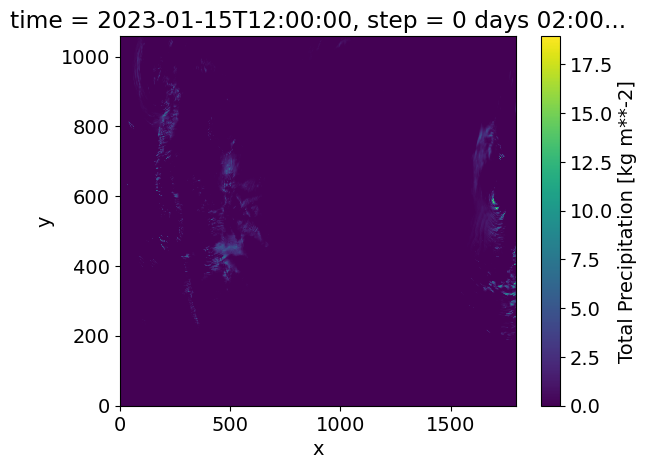

In [154]:
ds.tp.isel(step=1).plot()

In [155]:
dsi = ds.herbie.nearest_points([(-87.6298, 41.8781), (-87.9789, 41.7183), (-87.9646831, 41.8031498)], 
                               names=["Chicago", "Argonne", "Barn"])
dsi

/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "tp".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.Dataset>
Dimensions:              (step: 46, point: 3)
Coordinates:
    time                 datetime64[ns] 2023-01-15T12:00:00
  * step                 (step) timedelta64[ns] 01:00:00 ... 1 days 22:00:00
    surface              float64 0.0
    latitude             (point) float64 41.88 41.71 41.79
    longitude            (point) float64 272.4 272.0 272.0
    valid_time           (step) datetime64[ns] 2023-01-15T13:00:00 ... 2023-0...
    metpy_crs            object Projection: lambert_conformal_conic
    y                    (point) float64 4.197e+05 3.987e+05 4.077e+05
    x                    (point) float64 8.185e+05 7.915e+05 7.915e+05
  * point                (point) <U7 'Chicago' 'Argonne' 'Barn'
Data variables:
    tp                   (point, step) float32 0.0 0.0 0.0 0.0 ... 0.0 0.013 0.0
    gribfile_projection  (point) object None None None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            (:APCP:surface:0-1 h*|:APCP:surface:1-2 h*|:APCP...

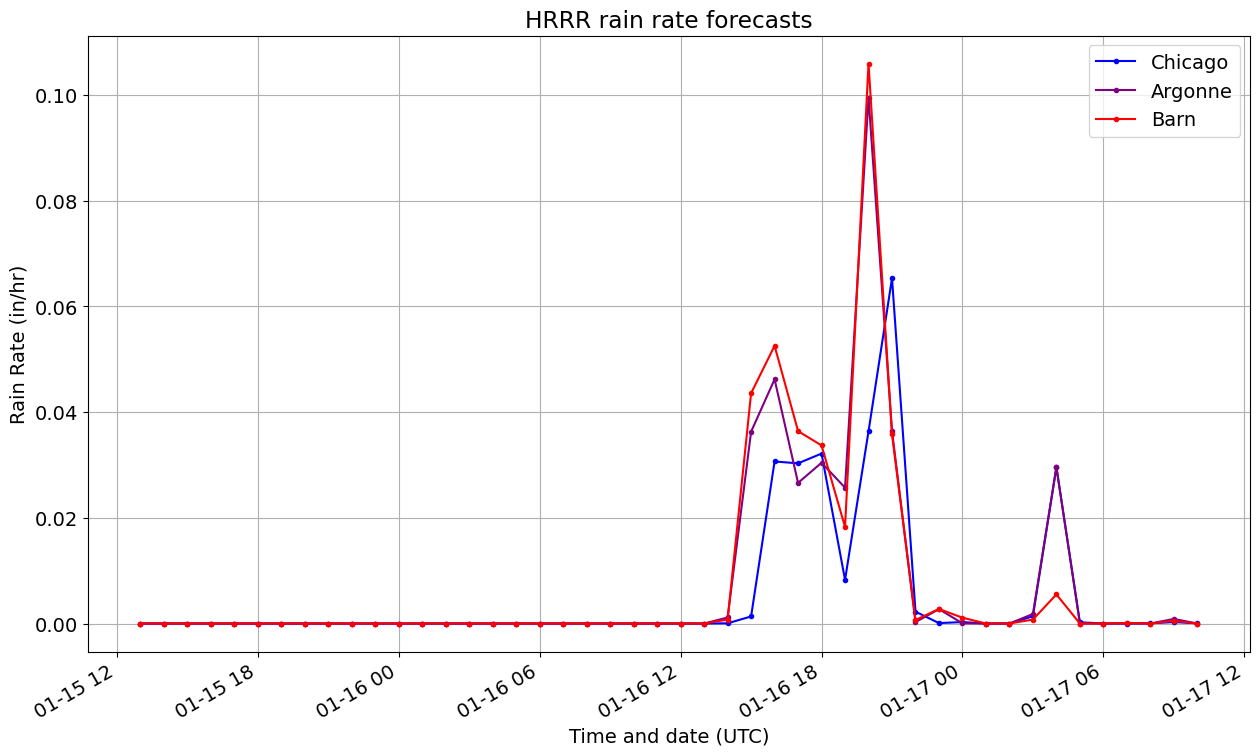

In [157]:
inches_per_mm = 0.0393701

plt.figure(figsize=[15,8])
(dsi.tp*inches_per_mm).isel(point=0).plot(color='blue', x="valid_time", marker=".", label=dsi.point[0].values)
(dsi.tp*inches_per_mm).isel(point=1).plot(color='purple', x="valid_time", marker=".", label=dsi.point[1].values)
(dsi.tp*inches_per_mm).isel(point=2).plot(color='red', x="valid_time", marker=".", label=dsi.point[2].values)

plt.grid()
plt.ylabel('Rain Rate (in/hr)')
plt.xlabel('Time and date (UTC)')
plt.title('HRRR rain rate forecasts')


plt.legend()